# Cross-validation for parameter tuning, model selection, and feature selection (video #7)

Videos:
* https://www.youtube.com/watch?v=Gol_qOgRqfA&list=PL5-da3qGB5ICeMbQuqbbCOQWcS6OYBr5A&index=8
* https://www.youtube.com/watch?v=Gol_qOgRqfA&list=PL5-da3qGB5ICeMbQuqbbCOQWcS6OYBr5A&index=8

__Steps for K-fold cross-validation__
1. Split the dataset into K equal partitions (or "folds").
2. Use fold 1 as the testing set and the union of the other folds as the training set.
3. Calculate testing accuracy.
4. Repeat steps 2 and 3 K times, using a different fold as the testing set each time.
5. Use the average testing accuracy as the estimate of out-of-sample accuracy.

# Comparing cross-validation to train/test split
**Advantages of cross-validation:**

* More accurate estimate of out-of-sample accuracy
* More "efficient" use of data (every observation is used for both training and testing)

**Advantages of train/test split:**

* Runs K times faster than K-fold cross-validation
* Simpler to examine the detailed results of the testing process
**Cross-validation recommendations**
* K can be any number, but K=10 is generally recommended
* For classification problems, stratified sampling is recommended for creating the folds
    * Each response class should be represented with equal proportions in each of the K folds
    * scikit-learn's cross_val_score function does this by default

# Cross-validation recommendations
1. K can be any number, but K=10 is generally recommended
2. For classification problems, stratified sampling is recommended for creating the folds
    * Each response class should be represented with equal proportions in each of the K folds
    * scikit-learn's cross_val_score function does this by default

In [59]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression

In [60]:
# read in the iris data
iris = load_iris()

# create X (features) and y (response)
XIRIS = iris.data
YIRIS = iris.target

In [61]:
knn=KNeighborsClassifier(n_neighbors=5)

#parameters: model object, X and y, cv(10 fold cross validation),classification=accuracy
scores=cross_val_score(knn,XIRIS,YIRIS,cv=10,scoring='accuracy')
scores

array([1.        , 0.93333333, 1.        , 1.        , 0.86666667,
       0.93333333, 0.93333333, 1.        , 1.        , 1.        ])

In [63]:
knnRange = range(1,26)
scoresRange=[]
for k in knnRange:
    kTemp = KNeighborsClassifier(n_neighbors=k)
    scoresTemp=cross_val_score(kTemp,XIRIS,YIRIS,cv=10,scoring='accuracy')
    scoresRange.append(scoresTemp.mean())
print(scoresRange)


[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666]


Text(0,0.5,'Accuracy')

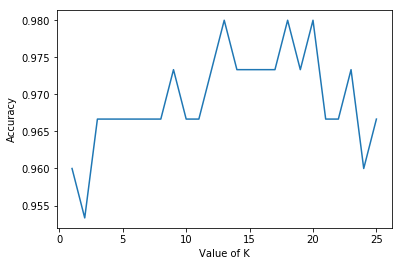

In [64]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.plot(knnRange,scoresRange)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")

# Compare result between KNN and Logistic Regression
Above shows knn=20 is best

In [65]:
knn20=KNeighborsClassifier(n_neighbors=20)

#parameters: model object, X and y, cv(10 fold cross validation),classification=accuracy
scores=cross_val_score(knn20,XIRIS,YIRIS,cv=10,scoring='accuracy')
scores.mean()

0.9800000000000001

In [66]:
lg=LogisticRegression()

#parameters: model object, X and y, cv(10 fold cross validation),classification=accuracy
scores=cross_val_score(lg,XIRIS,YIRIS,cv=10,scoring='accuracy')
scores.mean()

0.9533333333333334

# Cross-validation example: feature selection in Linear Regression 

In [67]:
import pandas as pd
from sklearn import metrics
from sklearn import linear_model

In [68]:
data = pd.read_csv('data/Advertising.csv', index_col=0)

feature=['TV','Radio','Newspaper']
XADVERTISEMENT= data[feature]
YADVERTISEMENT= data['Sales']
lr= linear_model.LinearRegression()
scores=cross_val_score(lr,XADVERTISEMENT,YADVERTISEMENT,cv=10,scoring='neg_mean_squared_error')
scores
# fix the sign of MSE scores
mse_scores = -scores
#print(mse_scores)
# convert from MSE to RMSE
rmse_scores = np.sqrt(mse_scores)
#print(rmse_scores)
# calculate the average RMSE
print(rmse_scores.mean())

#Features Radio and TV
feature_cols = ['TV', 'Radio']
X = data[feature_cols]
print(np.sqrt(-cross_val_score(lr, XADVERTISEMENT, YADVERTISEMENT, cv=10, scoring='neg_mean_squared_error')).mean())

1.6913531708051797
1.6913531708051797


# Improvements to cross-validation
__Repeated cross-validation__

* Repeat cross-validation multiple times (__with different random splits of the data__) and average the results
* More reliable estimate of out-of-sample performance by __reducing the variance__ associated with a single trial of cross-validation

__Creating a hold-out set__

* "Hold out" a portion of the data __before__ beginning the model building process
* Locate the best model using cross-validation on the remaining data, and test it using the hold-out set
* More reliable estimate of out-of-sample performance since hold-out set is truly out-of-sample

__Feature engineering and selection within cross-validation iterations__

* Normally, feature engineering and selection occurs before cross-validation
* Instead, perform all feature engineering and selection within each cross-validation iteration
* More reliable estimate of out-of-sample performance since it better mimics the application of the model to out-of-sample data

# More efficient parameter tuning using GridSearchCV

In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
k_range = list(range(1, 31))
print(k_range)
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)
print(param_grid)

# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [71]:
# fit the grid with data
grid.fit(XIRIS, YIRIS)
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.960000,0.053333,{'n_neighbors': 1}
1,0.953333,0.052068,{'n_neighbors': 2}
2,0.966667,0.044721,{'n_neighbors': 3}
3,0.966667,0.044721,{'n_neighbors': 4}
4,0.966667,0.044721,{'n_neighbors': 5}
5,0.966667,0.044721,{'n_neighbors': 6}
6,0.966667,0.044721,{'n_neighbors': 7}
7,0.966667,0.044721,{'n_neighbors': 8}
8,0.973333,0.032660,{'n_neighbors': 9}
9,0.966667,0.044721,{'n_neighbors': 10}


In [73]:
# examine the first result
print(grid.cv_results_['params'][0])
print(grid.cv_results_['mean_test_score'][0])
# print the array of mean scores only
grid_mean_scores = grid.cv_results_['mean_test_score']
print(grid_mean_scores)

{'n_neighbors': 1}
0.96
[0.96       0.95333333 0.96666667 0.96666667 0.96666667 0.96666667
 0.96666667 0.96666667 0.97333333 0.96666667 0.96666667 0.97333333
 0.98       0.97333333 0.97333333 0.97333333 0.97333333 0.98
 0.97333333 0.98       0.96666667 0.96666667 0.97333333 0.96
 0.96666667 0.96       0.96666667 0.95333333 0.95333333 0.95333333]


Text(0,0.5,'Cross-Validated Accuracy')

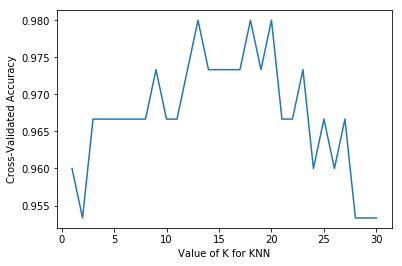

In [74]:
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [75]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.98
{'n_neighbors': 13}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')
